# What happens to the mutation metrics in different flavors of environment?

# INITIALIZATION

In [2]:
def add_treatment(dic, series, label=None, longname=None, 
                  shortname=None, designation=None,
                  experiment=None, subexperiment=None, treatment=None, location=None, filename=None):
    if not label:
        if (experiment):
            label = experiment
            if (treatment):
                label += "_" + treatment
        else:
            print "ERROR, call must contain either label or experiment."
   
    if not longname:
        if (experiment):
            longname = experiment
            if (treatment):
                longname += "_" + treatment
        else:
            longname = label
        
    if not shortname:
        if (experiment):
            shortname = experiment
            if (treatment):
                shortname += "_" + treatment
        else:
            shortname = label
            
    if not experiment:
        experiment = label
    
    if not location:        
        location = series
        if (designation):
            location += "_" + designation            
        location += "_" + experiment
        if (subexperiment):
            location += "_" + subexperiment
        if (treatment):
            location += "_" + treatment
        location += "_" + series
    
    dic[label] = {'longlabel': longname, 'shortlabel': shortname, 
                  'dir': location, 'exp': experiment, 'subex': subexperiment,
                  'treatment': treatment, 'designation': designation, 'filename': filename}    

In [5]:
import collections

## Dataset-specific -- edit me
data_number = "901"
data_name = "CyclicCE 3Input QuiescentPeriod vs CE Diversity__longer"


treatments = collections.OrderedDict()
add_treatment(treatments, data_number, designation="D2", label="Control", experiment="control_intertwined",
             location="D2_control_intertwined_"+data_number)
add_treatment(treatments, data_number, designation="E1", label="Benign", experiment="noreward_intertwined",
             location="E1_noreward_intertwined_"+data_number)
add_treatment(treatments, data_number, designation="F1", label="Harsh", experiment="punish_intertwined",
             location="F1_punish_intertwined_"+data_number)

add_treatment(treatments, data_number, designation="E2", label="Benign_PR", experiment="noreward_ce_pr_intertwined",
             location="E2_noreward_ce_pr_intertwined_"+data_number)
add_treatment(treatments, data_number, designation="F2", label="Harsh_PR", experiment="punish_ce_pr_intertwined",
             location="F2_punish_ce_pr_intertwined_"+data_number)

#add_treatment(treatments, data_number, designation="E3", label="Benign_Long", experiment="noreward_intertwined",
#             location="E3_noreward_intertwined_"+data_number)
#add_treatment(treatments, data_number, designation="E4", label="Benign_PR_Long", experiment="noreward_ce_pr_intertwined",
#             location="E4_noreward_ce_pr_intertwined_"+data_number)

add_treatment(treatments, data_number, designation="G1", label="Harsh_PR_Benign", experiment="punish_ce_pr_noreward_intertwined",
             location="G1_punish_ce_pr_noreward_intertwined_"+data_number)

## basic config
base_path = "/Core/home/rosiec/__research/mutational_landscapes/raw_data/"
analysis_directory = "analysis"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + data_directory
analysis_path = data_path + "/" + analysis_directory

print data_path
print analysis_path

print treatments.keys()
for val in treatments.values():
    print val

/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer
/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis
['Control', 'Benign', 'Harsh', 'Benign_PR', 'Harsh_PR', 'Harsh_PR_Benign']
{'shortlabel': 'control_intertwined', 'longlabel': 'control_intertwined', 'exp': 'control_intertwined', 'subex': None, 'filename': None, 'designation': 'D2', 'dir': 'D2_control_intertwined_901', 'treatment': None}
{'shortlabel': 'noreward_intertwined', 'longlabel': 'noreward_intertwined', 'exp': 'noreward_intertwined', 'subex': None, 'filename': None, 'designation': 'E1', 'dir': 'E1_noreward_intertwined_901', 'treatment': None}
{'shortlabel': 'punish_intertwined', 'longlabel': 'punish_intertwined', 'exp': 'punish_intertwined', 'subex': None, 'filename': None, 'designation': 'F1', 'dir': 'F1_punish_intertwined_901', 'treatment': None}
{'shortlabel': 'noreward_ce_pr_int

In [6]:
%cd {data_path}
!mkdir incomplete

import glob
import os

target_update = '400000'

bleh = []
for t in treatments:
    datafiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
    for item in datafiles:
        filepath = item +"/data/count.dat"
        #print filepath
        line = !tail -n 1 $filepath
        if not os.path.exists(filepath):
            filepath += ".gz"
            line = !zcat $filepath | tail -n 1 
            
            if not os.path.exists(filepath):
                print "count.dat[.gz] does not exist. Cannot verify. Continuing."
                continue
        
#        print filepath

        #bleh = line
#        print line
        #line = line.split(' ')[0]
        #print line
        if len(line) == 0 or line[0].split(' ')[0] != target_update:
            print "Incomplete", item, line
            !mv $item incomplete/
    
%mkdir {analysis_directory}
%cd {analysis_directory}
#%pwd

for t in treatments:
    print t, ": " , len(glob.glob(data_path+'/'+treatments[t]['dir']+'*'))
    
 

/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer
mkdir: cannot create directory ‘incomplete’: File exists
mkdir: cannot create directory ‘analysis’: File exists
/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis
Control :  100
Benign :  100
Harsh :  100
Benign_PR :  99
Harsh_PR :  100
Harsh_PR_Benign :  99


In [7]:
import glob
import sys

import pandas as pd
import seaborn as sns
sns.set_context('paper', font_scale=2)
import numpy as np
import matplotlib.pyplot as plt
import scipy  
#import scikits.bootstrap as bootstrap
from scipy import stats
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage
#%pylab inline
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4)
%rehashx
pd.__version__

u'0.20.3'

In [8]:
%pwd
direct = treatments[treatments.keys()[0]]['dir']

filepath = direct + "001/data/log_average.dat"
if os.path.exists(filepath):
    %cat ../{filepath} | head -n 20
else:
    %zcat ../{filepath}.gz | head -n 20

# Avida Fitness Data
# Mon Aug 14 12:07:34 2017
#  1: Update
#  2: Fitness
#  3: Fitness STE
#  4: Fitness Variance
#  5: Log Fitness
#  6: Log Fitness STE
#  7: Log Fitness Variance

0 0 0 0 -inf -nan -nan 
50 63.0008 0.16173 94.1641 -inf -nan -nan 
100 63.5306 0.12915 59.8139 4.09154 0.0103915 0.387225 
150 63.2881 0.140456 70.8428 4.07936 0.0110362 0.437376 
200 63.5422 0.127665 58.6256 4.09465 0.0100996 0.366899 
250 63.1564 0.150752 81.6097 4.0616 0.0123069 0.543889 
300 63.3183 0.137134 67.5689 4.08057 0.011029 0.437052 
350 63.3708 0.134796 65.4118 4.08582 0.010593 0.403958 
400 63.4589 0.131133 61.8533 4.09121 0.0102628 0.378856 
450 63.3713 0.135243 65.8095 4.08682 0.0105045 0.397021 

gzip: stdout: Broken pipe


In [9]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

## Sums! :)

In [10]:
## generate sums datafiles

def extract_stats(treatments, datafile, fieldname, field_num, verbose=True, calc="mean"):
    ## calc can be "calculate_stats", "mean", "median", "ste", "std", "var", "sum"   

    outfiles = ""
    for t in treatments:
        datafiles = ""
        outfile = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"

        dfiles = glob.glob(data_path+'/'+treatments[t]['dir']+'*')
        for item in dfiles:
            filepath = item +"/data/"+datafile
            if not os.path.exists(filepath):
                filepath += ".gz"            
            
            datafiles += filepath + " "

        script  = scripts_path + 'common/extract_single_column_to_csv.py --'+calc+' -s " " ' + field_num + ' '
        script += datafiles
        script += ' >> ' + outfile

        if verbose:
            print script
            print
            
        !rm $outfile
        !python2 $script

        #!cat $outfile
        if verbose:
            print outfile
        outfiles += outfile + " "        

#incoming_postfix = '_active_site_count.csv'
        
def import_data(treatments, fieldname, location=""):    
    
    if location:
        for t in treatments:
            f = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"
            df = location + f ## if they're somewhere else, for whatever reason
            print "moving from", df, "to", f
            !cp $df ./$f

    dfs = []
    for t in treatments:      
        ## pull in the data    
        f = treatments[t]['shortlabel'] + "_" + fieldname + ".csv"
        dta = pd.read_csv(f, header=None, skipinitialspace=True, names=[fieldname])
        
        #print dta.dropna().head()
        dta = dta.dropna()

        dta['Label'] = [treatments[t]['shortlabel']] * len(dta)
        dta['Experiment'] = [treatments[t]['exp']] * len(dta)
        dta['SubExp'] = [treatments[t]['subex']] * len(dta)
        dta['Treatment'] = [treatments[t]['treatment']] * len(dta)

#         wholex = treatments[t]['exp']
#         if treatments[t]['subex']:
#             wholex += "\n" + treatments[t]['subex']
#         dta['Whole_Experiment'] = [wholex] * len(dta)
        dfs.append(dta)

    bigframe = pd.concat(dfs, axis=0)
    bigframe.head()
    return bigframe #.dropna()

extract_stats(treatments, "average.dat", "fitness", "4", verbose=False)
df = import_data(treatments, "fitness")
print df.head()
print df.tail()


rm: cannot remove ‘control_intertwined_fitness.csv’: No such file or directory
rm: cannot remove ‘noreward_intertwined_fitness.csv’: No such file or directory
rm: cannot remove ‘punish_intertwined_fitness.csv’: No such file or directory
rm: cannot remove ‘noreward_ce_pr_intertwined_fitness.csv’: No such file or directory
rm: cannot remove ‘punish_ce_pr_intertwined_fitness.csv’: No such file or directory
rm: cannot remove ‘punish_ce_pr_noreward_intertwined_fitness.csv’: No such file or directory
      fitness                Label           Experiment SubExp Treatment
0  187.198144  control_intertwined  control_intertwined   None      None
1  174.368275  control_intertwined  control_intertwined   None      None
2  269.029422  control_intertwined  control_intertwined   None      None
3  171.927685  control_intertwined  control_intertwined   None      None
4  132.934770  control_intertwined  control_intertwined   None      None
       fitness                              Label  \
94  122.2

rm: cannot remove ‘control_intertwined_mean_log_fitness.csv’: No such file or directory
rm: cannot remove ‘noreward_intertwined_mean_log_fitness.csv’: No such file or directory
rm: cannot remove ‘punish_intertwined_mean_log_fitness.csv’: No such file or directory
rm: cannot remove ‘noreward_ce_pr_intertwined_mean_log_fitness.csv’: No such file or directory
rm: cannot remove ‘punish_ce_pr_intertwined_mean_log_fitness.csv’: No such file or directory
rm: cannot remove ‘punish_ce_pr_noreward_intertwined_mean_log_fitness.csv’: No such file or directory


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:2764: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


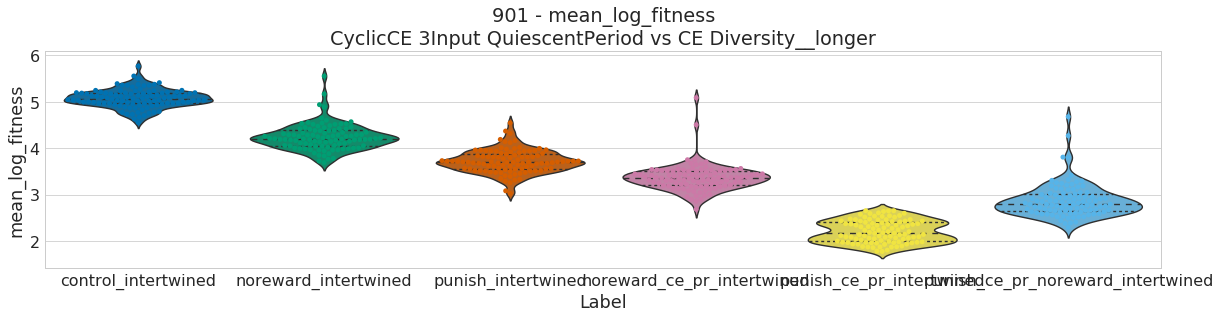

In [11]:
datafile = "log_average.dat"
field = "5"
fieldname = 'mean_log_fitness'

extract_stats(treatments, datafile, fieldname, field, verbose=False)
df = import_data(treatments, fieldname)

sns.set(style="whitegrid", 
        color_codes=True, 
        palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (20, 4)
plt.title(data_number + " - "+ fieldname +"\n"+data_name)
sns.violinplot(x="Label", y=fieldname, #hue='Treatment', 
               data=df, 
               #split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="Label", y=fieldname, #hue='Treatment', 
              data=df, 
              split=True,
                 )


#print "HELLO"

# Extract the Task Stats

In [12]:
!pwd

/Core/home/rosiec/__research/mutational_landscapes/raw_data/901_CyclicCE_3Input_QuiescentPeriod_vs_CE_Diversity__longer/analysis


In [13]:
%pwd 
post_reward_data = []
for t in treatments:  

    print t
    
    post_reward = []
    post_reward_persistent = []
        
    for i in range(1,101):
        sys.stdout.write('.')        
        bit = str(i).zfill(2)
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
        dfiles = sorted(glob.glob(globstring))
        #print globstring
        
        for item in dfiles:
            sys
            #print item
            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=range(71),
                              skipinitialspace=True) #, names=fields)
            
            
            post_reward.append( len(df.tail(2000).mean().nonzero()[0]) - 3 )
            # 3.6 is 1% of the population at any given time
            post_reward_persistent.append( len(df.tail(2000).mean().where(lambda x : x > 3.6).dropna().nonzero()[0]) - 3 )
    print " done"        
    
    intermediate = pd.DataFrame()
    intermediate['tasks performed'] = post_reward
    intermediate['treatment'] = [t] * len(post_reward)
    intermediate['persistence'] = ['incl. transient'] * len(post_reward)
    
    post_reward_data.append(intermediate)

    intermediate = pd.DataFrame()
    intermediate['tasks performed'] = post_reward_persistent
    intermediate['treatment'] = [t] * len(post_reward_persistent)
    intermediate['persistence'] = ['persistent'] * len(post_reward_persistent)
    
    post_reward_data.append(intermediate)

post_reward = pd.concat(post_reward_data)


            

Control
.................................................................................................... done
Benign
.................................................................................................... done
Harsh
.................................................................................................... done
Benign_PR
.................................................................................................... done
Harsh_PR
.................................................................................................... done
Harsh_PR_Benign
.................................................................................................... done


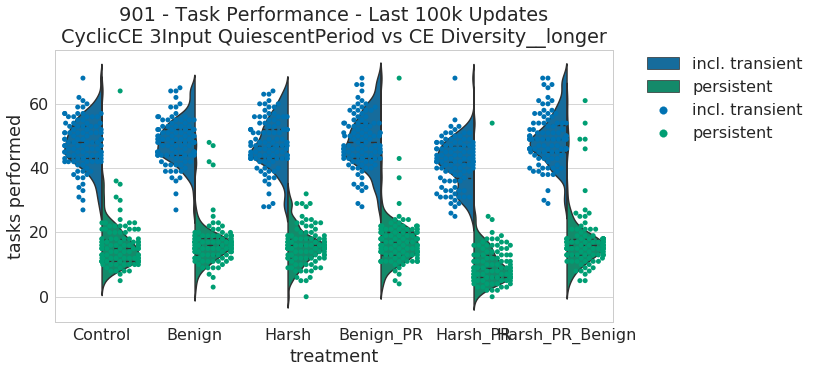

In [14]:
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title(data_number + " - Task Performance - Last 100k Updates" + "\n"+data_name)
sns.violinplot(x="treatment", y="tasks performed", hue='persistence', 
               data=post_reward, 
               split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               
               )
sns.swarmplot(x="treatment", y="tasks performed", hue='persistence', 
              data=post_reward, 
              split=True,
                 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#print "HELLO"

# Task Performance - Timeseries

In [10]:
data = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,101):
                
        bit = str(i).zfill(2) ## runs from 01 to 50
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
        dfiles = sorted(glob.glob(globstring))

        for item in dfiles:
            sys.stdout.write('.')

            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=[0]+range(3, 71),
                              skipinitialspace=True) #, names=fields)
            
            
            df['treatment'] = [t] * len(df)
            df['replicate'] = [i] * len(df)
                
                
            ## TODO, collect the booled bits.
            ## figure out how to do this efficiently, while fighting with the fucking series.
            col_list = list(df)
            col_list.remove(0)
            
            bleh = df[col_list].where(lambda x : x > 3.6, axis=1)
            bleh = bleh.fillna(value=0, axis=1).astype(bool)
            
            running = [False] * len(bleh.iloc[0].tolist())
            running_post_reward = [False] * len(bleh.iloc[0].tolist())
            running_ct = []
            running_post_reward_ct = []

            for i in range(len(bleh)):
                
                running = [k | j for k,j in zip(running, bleh.iloc[i].tolist())]
                running_ct.append(sum( [int(l) for l in running] ))
                
                if (i * 50) >= 200000:
                    running_post_reward = [k | j for k,j in zip(running_post_reward, bleh.iloc[i].tolist())]
                    running_post_reward_ct.append(sum( [int(l) for l in running_post_reward] ))
                    
                else:
                    running_post_reward_ct.append(0)
                    
                
            

            df['new_tasks'] = running_ct
            df['new_tasks_post_reward'] = running_post_reward_ct
                
            dfs.append( df )
            
    intermediate = pd.concat(dfs)
    
    col_list = list(intermediate)
    col_list.remove(0)
    
    dta = pd.DataFrame()

    dta['update'] = intermediate[0]
    
    dta['treatment'] = intermediate['treatment']
        
    dta['replicate'] = intermediate['replicate']
    
    dta['new_tasks'] = intermediate['new_tasks']
    dta['new_tasks_post_reward'] = intermediate['new_tasks_post_reward']
    
    dta['task_sum'] = intermediate[col_list].sum(axis=1)
        
    bleh = intermediate[col_list].where(lambda x : x > 3.6, axis=1)
    bleh = bleh.fillna(value=0, axis=1).astype(bool).sum(axis=1)   
    dta['task_ct'] = bleh
        
    #print dta.describe()
    #print dta.head()
    
    data.append(dta)
        
    print "  done"
    
data = pd.concat(data)

#print data.describe()
#print data.head()  

slice_200k = data.loc[data['update'] >= 200000]

Control
....................................................................................................  done
Benign
....................................................................................................  done
Harsh
....................................................................................................  done
Benign_PR
...................................................................................................  done
Harsh_PR
....................................................................................................  done
Harsh_PR_Benign
...................................................................................................  done


## Task Performance

/usr/local/lib/python2.7/dist-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


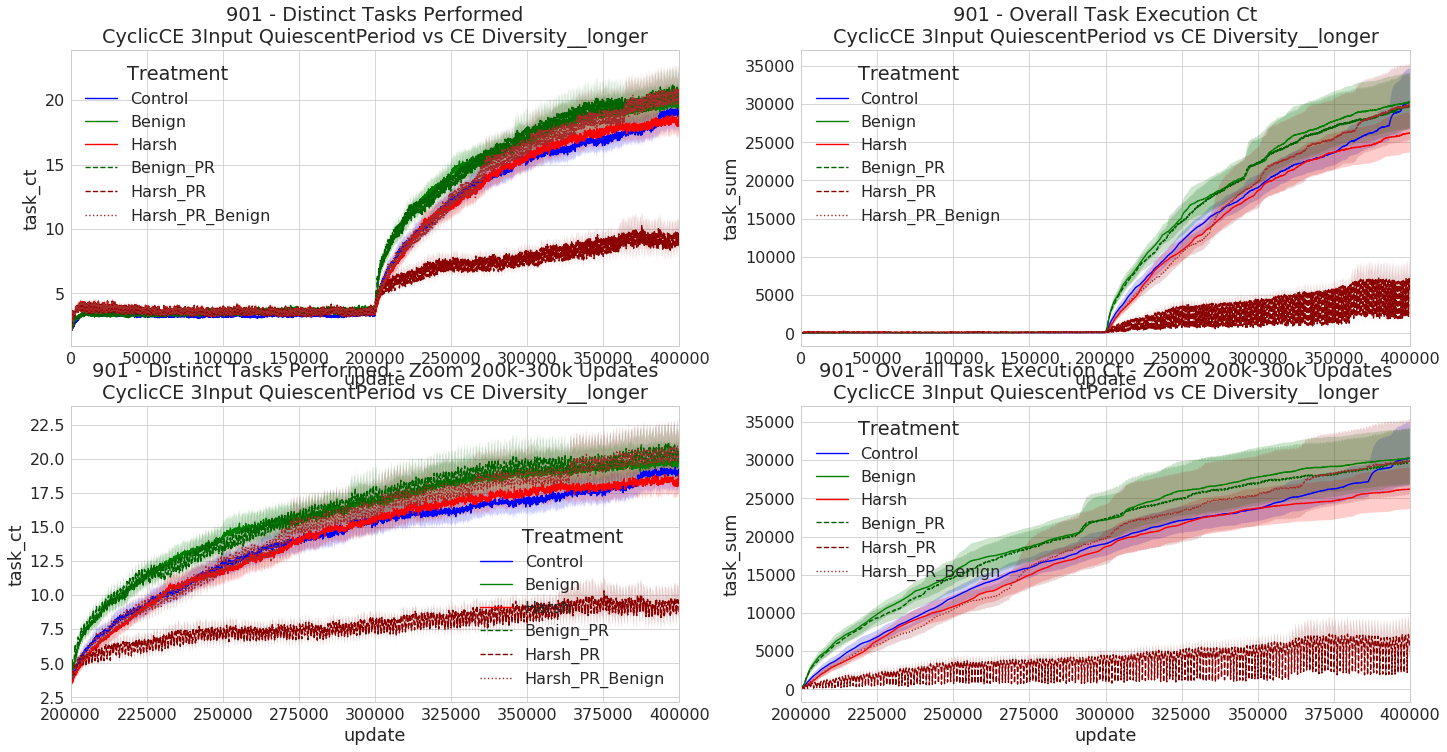

In [16]:
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (24, 12)

plt.subplot(221)

plt.title(data_number + " - Distinct Tasks Performed" + "\n"+data_name)
ax = sns.tsplot(time="update", value="task_ct",
                unit="replicate", 
                condition="treatment",
                data=data,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95],)
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
#plt.show()

plt.subplot(222)


plt.title(data_number + " - Overall Task Execution Ct" + "\n"+data_name)
ax = sns.tsplot(time="update", value="task_sum",
                unit="replicate", 
                condition="treatment",
                data=data,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95],)
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
#plt.show()

plt.subplot(223)


plt.title(data_number + " - Distinct Tasks Performed - Zoom 200k-300k Updates" + "\n"+data_name)
ax = sns.tsplot(time="update", value="task_ct",
                unit="replicate", 
                condition="treatment",
                data=slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95],)
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
#plt.show()
plt.subplot(224)


plt.title(data_number + " - Overall Task Execution Ct - Zoom 200k-300k Updates" + "\n"+data_name)
ax = sns.tsplot(time="update", value="task_sum",
                unit="replicate", 
                condition="treatment",
                data=slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95],)
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
plt.show()


## Task Discovery

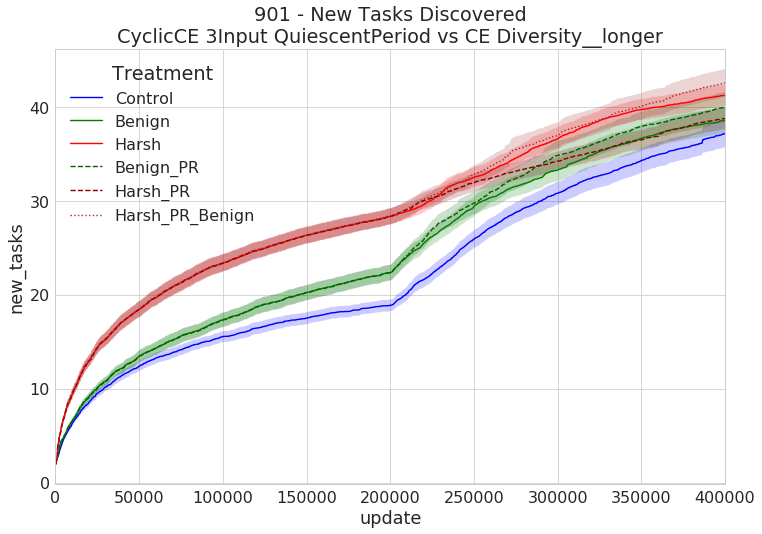

In [17]:
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks",
            unit="replicate", 
            condition="treatment",
            data=data,
            color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
            ci=[95],
          )
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
plt.show()

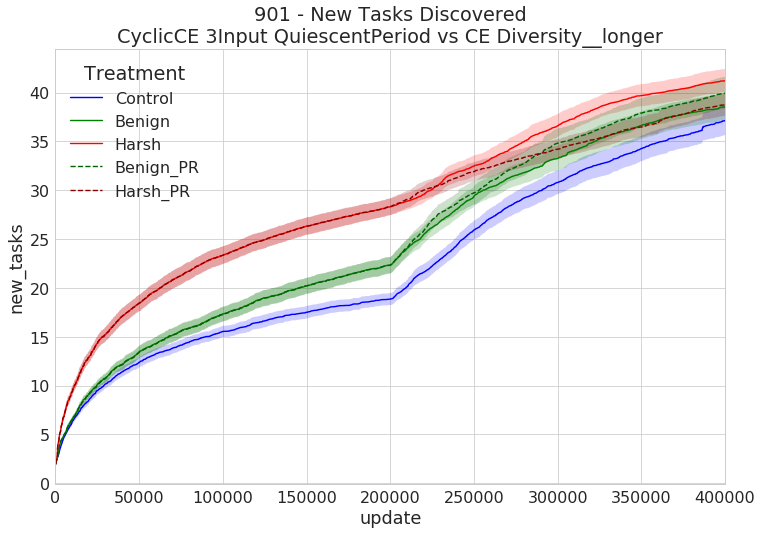

In [14]:
whittled_data = data[ (data['treatment'] != 'Harsh_PR_Benign') ]

sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks",
            unit="replicate", 
            condition="treatment",
            data=whittled_data,
            color=['blue','green','red', 'darkgreen', 'darkred'],#, 'brown'],
            ci=[95],
          )
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
#ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
plt.show()

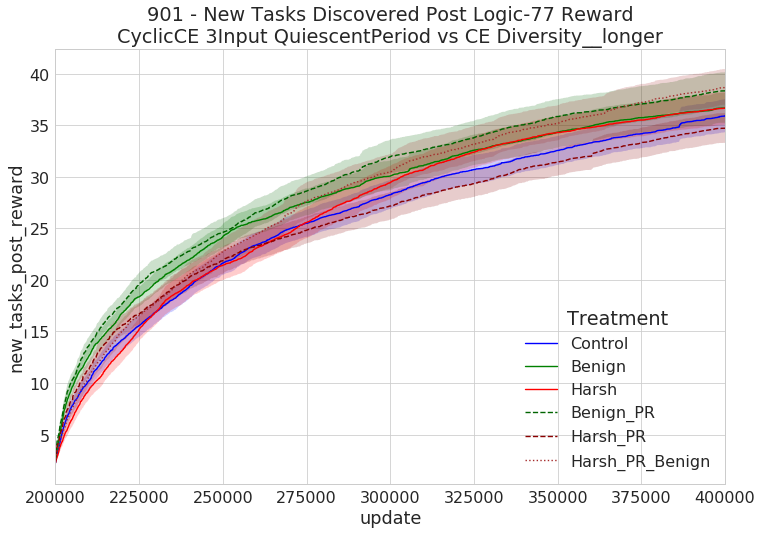

In [18]:
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
plt.show()

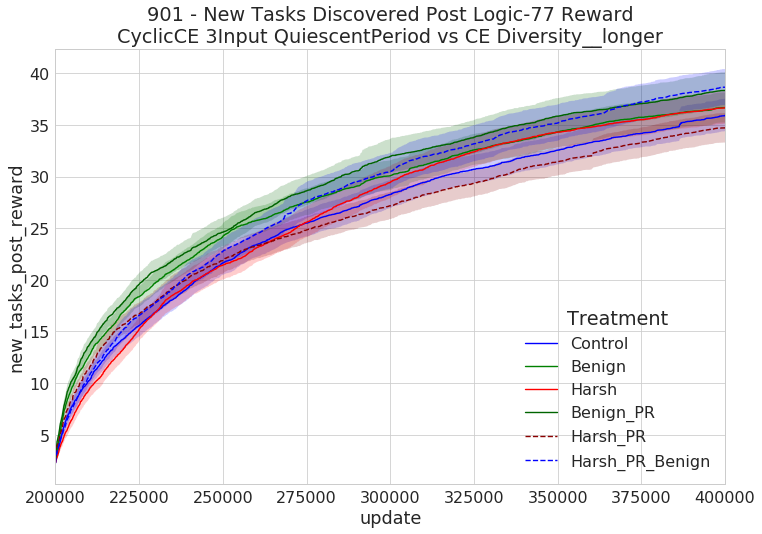

In [15]:
whittled_data = data[ (data['treatment'] != 'Harsh_PR_Benign') ]

plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred'],# 'brown'],
                ci=[95],
          )
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')

ax.legend(title='Treatment')
plt.show()

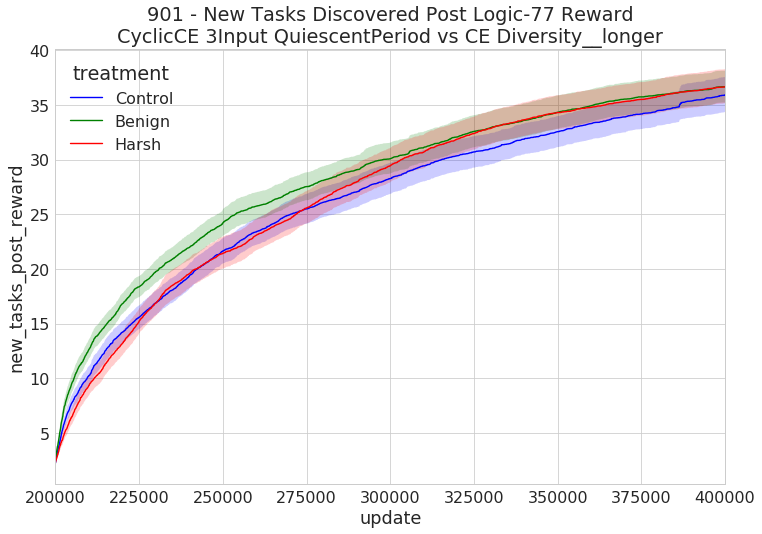

In [19]:
whittled_slice_200k = slice_200k[ (slice_200k['treatment'] == 'Control') | (slice_200k['treatment'] == 'Benign') | (slice_200k['treatment'] == 'Harsh') ]

plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_slice_200k,
                color=['blue','green','red'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('--')
#ax.lines[-2].set_linestyle('--')
#ax.lines[-1].set_linestyle(':')
#ax.legend(title='Treatment')

plt.show()

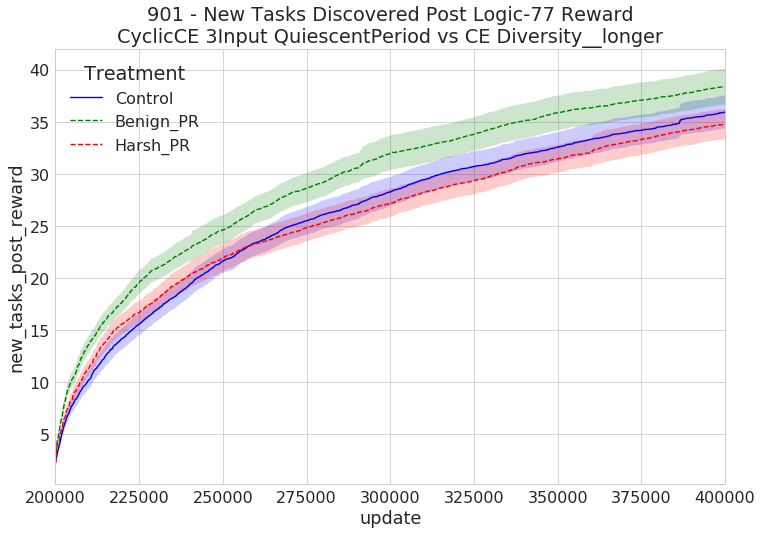

In [20]:
whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Control') | (slice_200k['treatment'] == 'Benign_PR') | (slice_200k['treatment'] == 'Harsh_PR') ]
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['blue','green','red'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

plt.show()

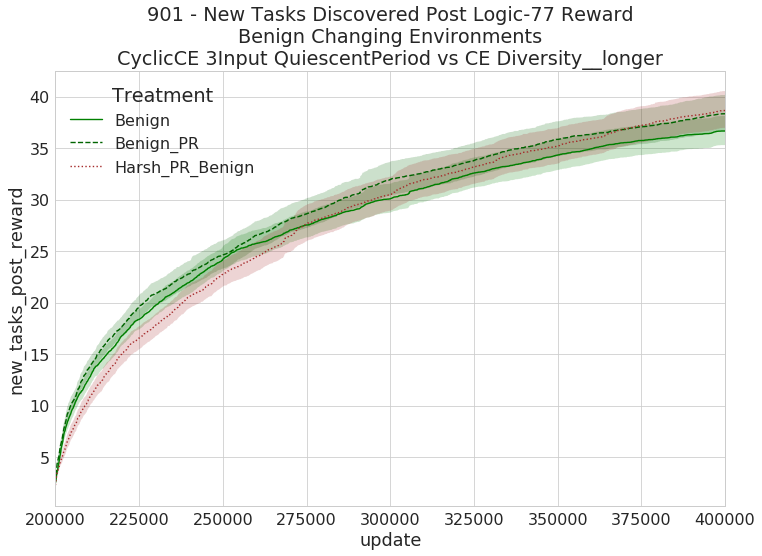

In [21]:
whittled_Benign = slice_200k[ (slice_200k['treatment'] == 'Benign') | 
                             (slice_200k['treatment'] == 'Benign_PR') | 
                             (slice_200k['treatment'] == 'Harsh_PR_Benign') ]
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nBenign Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Benign,
                color=['green','darkgreen','brown'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('-')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')

plt.show()

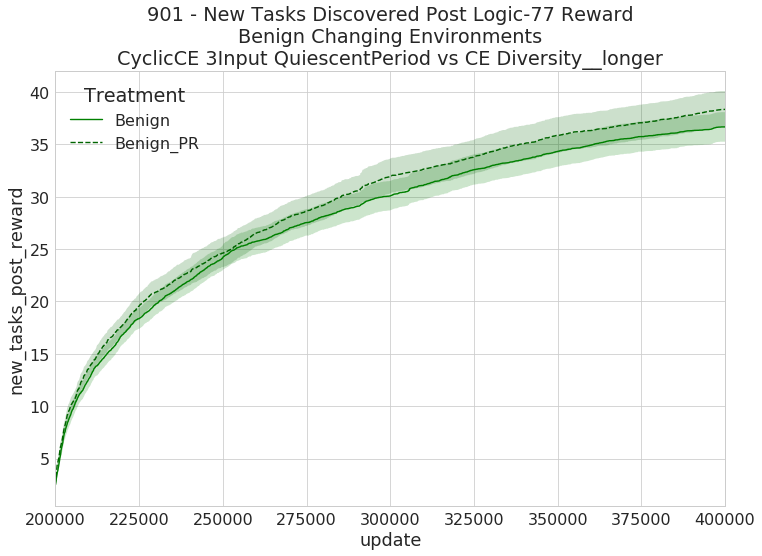

In [29]:
whittled_Benign = slice_200k[ (slice_200k['treatment'] == 'Benign') | 
                             (slice_200k['treatment'] == 'Benign_PR')  
                         ]
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nBenign Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Benign,
                color=['green','darkgreen','brown'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('-')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

plt.show()

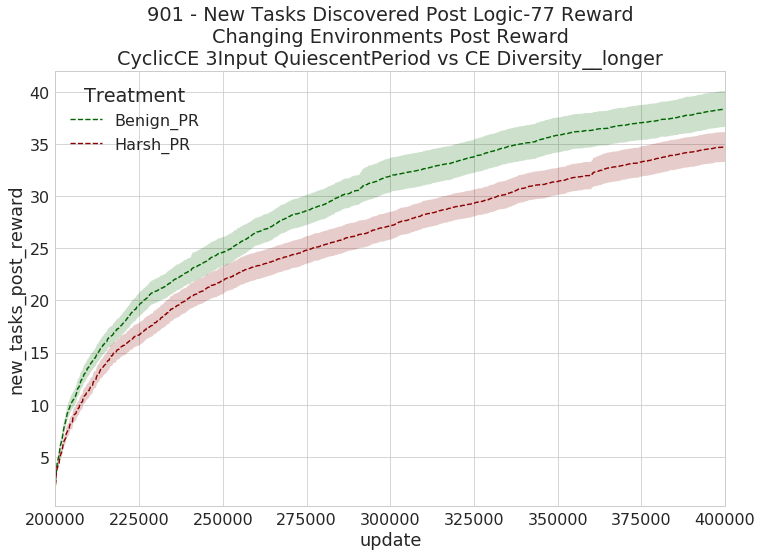

In [22]:
whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Benign_PR') | 
                         (slice_200k['treatment'] == 'Harsh_PR') ]
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nChanging Environments Post Reward" + 
          "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['darkgreen','darkred'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('-')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

plt.show()

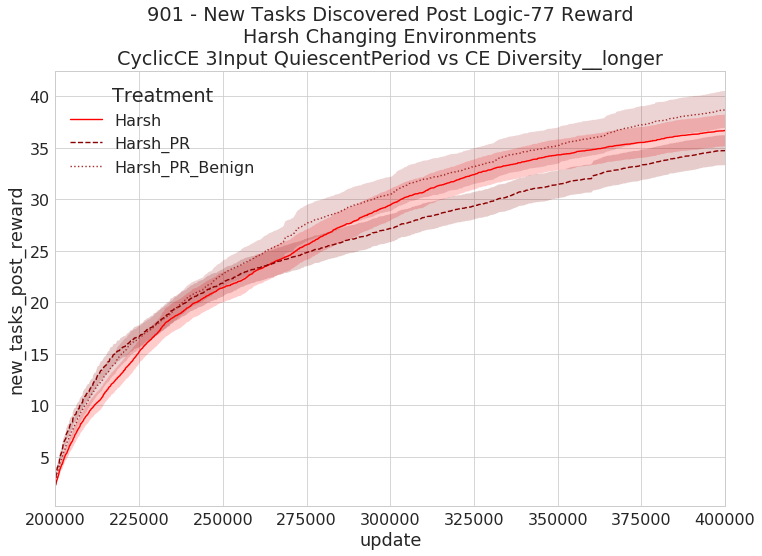

In [23]:
whittled_Harsh = slice_200k[ (slice_200k['treatment'] == 'Harsh') | 
                            (slice_200k['treatment'] == 'Harsh_PR') | 
                            (slice_200k['treatment'] == 'Harsh_PR_Benign') ]
plt.rcParams['figure.figsize'] = (12, 8)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nHarsh Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Harsh,
                color=['red','darkred','brown'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('-')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')

plt.show()

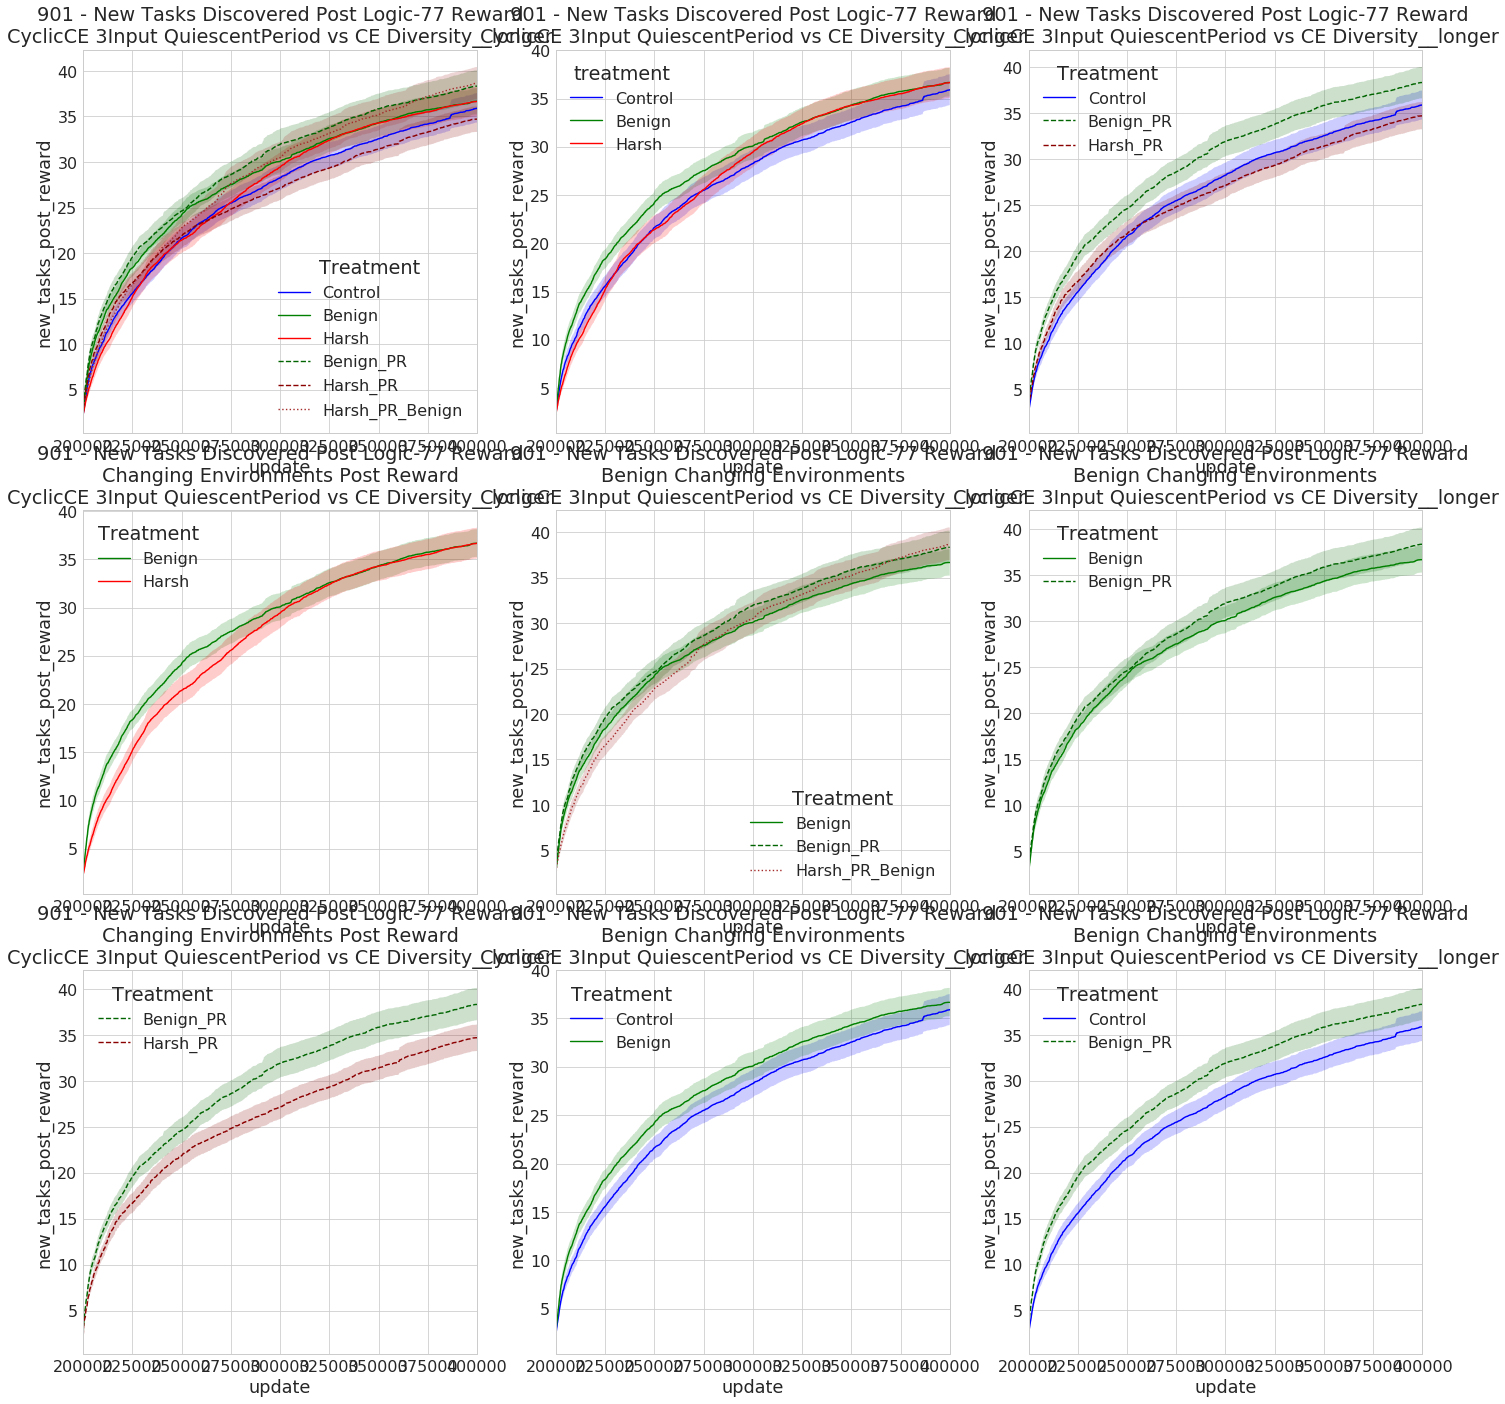

In [24]:
plt.rcParams['figure.figsize'] = (24, 24)

########### PLOT 1 -- 0,0

plt.subplot(331)

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')

############ PLOT 2 -- 1,0

plt.subplot(332)

whittled_slice_200k = slice_200k[ (slice_200k['treatment'] == 'Control') | 
                                 (slice_200k['treatment'] == 'Benign') | 
                                 (slice_200k['treatment'] == 'Harsh') ]
plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_slice_200k,
                color=['blue','green','red'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])


############# PLOT 3 -- 2,0

plt.subplot(333)

whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Control') | 
                         (slice_200k['treatment'] == 'Benign_PR') | 
                         (slice_200k['treatment'] == 'Harsh_PR') ]
plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['blue','darkgreen','darkred'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

############# PLOT 4 -- 0,1

plt.subplot(334)
whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Benign') | 
                         (slice_200k['treatment'] == 'Harsh') ]

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nChanging Environments Post Reward" + 
          "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['green','red'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.legend(title='Treatment')

############# PLOT 5 -- 1,1

plt.subplot(335)

whittled_Benign = slice_200k[ (slice_200k['treatment'] == 'Benign') | 
                             (slice_200k['treatment'] == 'Benign_PR') | 
                             (slice_200k['treatment'] == 'Harsh_PR_Benign') ]

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nBenign Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Benign,
                color=['green','darkgreen','brown'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')

############# PLOT 6 --2,1

plt.subplot(336)

whittled_Benign_PR_vs_Benign = slice_200k[(slice_200k['treatment'] == 'Benign_PR') | 
                             (slice_200k['treatment'] == 'Benign') ]

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nBenign Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Benign_PR_vs_Benign,
                color=['green','darkgreen'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

############# PLOT 7 -- 0,2

plt.subplot(337)
whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Benign_PR') | 
                         (slice_200k['treatment'] == 'Harsh_PR') ]

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nChanging Environments Post Reward" + 
          "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['darkgreen','darkred'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

############# PLOT 8 -- 1,2

plt.subplot(338)

whittled_Benign = slice_200k[ (slice_200k['treatment'] == 'Benign') | 
                             (slice_200k['treatment'] == 'Control') ]

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nBenign Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Benign,
                color=['blue','green'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.legend(title='Treatment')

############# PLOT 9 -- 2,2

plt.subplot(339)

whittled_Benign_PR_vs_Harsh = slice_200k[(slice_200k['treatment'] == 'Benign_PR') | 
                             (slice_200k['treatment'] == 'Control') ]

plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nBenign Changing Environments" + "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_Benign_PR_vs_Harsh,
                color=['blue','darkgreen'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')
plt.show()

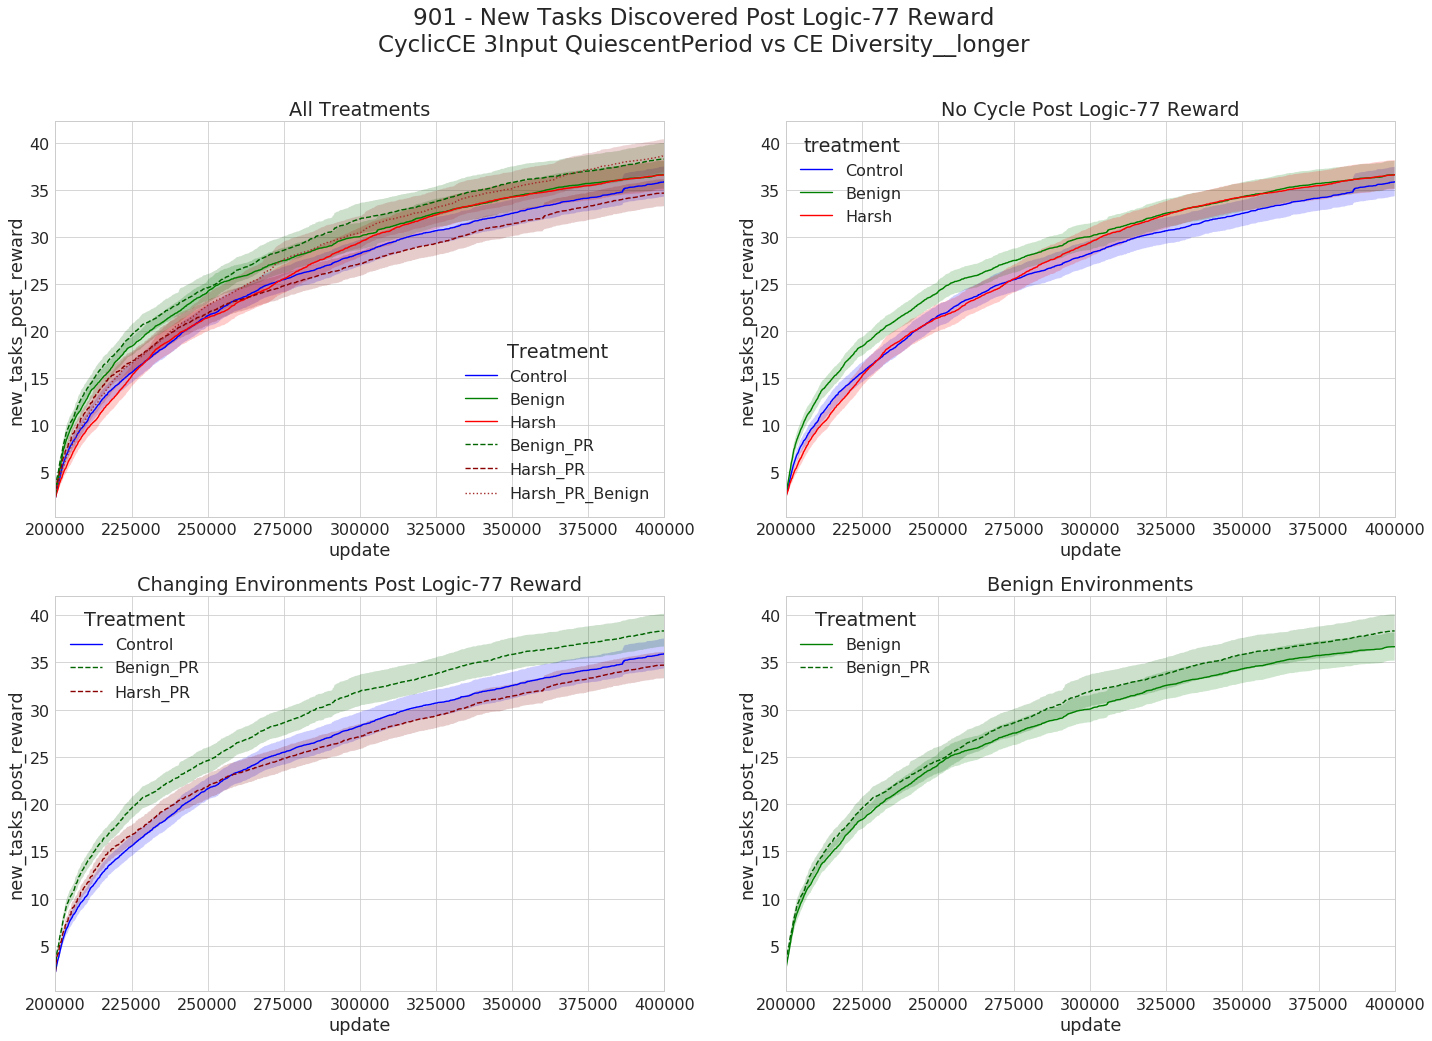

In [18]:
plt.rcParams['figure.figsize'] = (24, 16)

########### PLOT 1 -- 0,0

ax1 = plt.subplot(221)


#plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
plt.title("All Treatments")
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')

############ PLOT 2 -- 1,0

ax2 = plt.subplot(222, sharey=ax1)

whittled_slice_200k = slice_200k[ (slice_200k['treatment'] == 'Control') | 
                                 (slice_200k['treatment'] == 'Benign') | 
                                 (slice_200k['treatment'] == 'Harsh') ]
#plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
plt.title("No Cycle Post Logic-77 Reward")
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_slice_200k,
                color=['blue','green','red'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])


############# PLOT 3 -- 1,0

ax3 = plt.subplot(223, sharex=ax1)

whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Control') | 
                         (slice_200k['treatment'] == 'Benign_PR') | 
                         (slice_200k['treatment'] == 'Harsh_PR') ]
#plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)
plt.title("Changing Environments Post Logic-77 Reward")
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['blue','darkgreen','darkred'], #'darkgreen', 'darkred', 'brown'],
                ci=[95],
          )
#ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')



############# PLOT 4 -- 1,1

plt.subplot(224, sharex=ax2, sharey=ax3)
whittled_PR = slice_200k[ (slice_200k['treatment'] == 'Benign') | 
                         (slice_200k['treatment'] == 'Benign_PR') ]
plt.title("Benign Environments")
#plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward\nChanging Environments Post Reward" + 
#          "\n"+data_name)
ax = sns.tsplot(time="update", value="new_tasks_post_reward",
                unit="replicate", 
                condition="treatment",
                data=whittled_PR,
                color=['green','darkgreen'], #'darkgreen', 'darkred', 'brown'],
                ci=[95])
#ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle('--')
ax.legend(title='Treatment')

plt.suptitle(data_number + " - New Tasks Discovered Post Logic-77 Reward" + "\n"+data_name)

plt.show()

# End-Points

ctrl vs benign vs harsh - oneway anova
1.45694998636
0.234605653715
can't reject null of sameness


benign_pr vs harsh_pr
4.59131261353
4.40467004206e-06
reject null of sameness (different)

ctrl vs benign_pr
-3.40963430013
0.000650500412148
reject null of sameness (different)

ctrl vs harsh_pr
1.09708161032
0.272605718351
can't reject null of sameness


benign vs benign_pr
-1.79590485339
0.0725096504431
can't reject null of sameness

benign_pr vs harsh_pr_benign
1.58252131754
0.113530609739
can't reject null of sameness

harsh vs harsh_pr
1.96204127636
0.0497576788733
reject null of sameness (different)



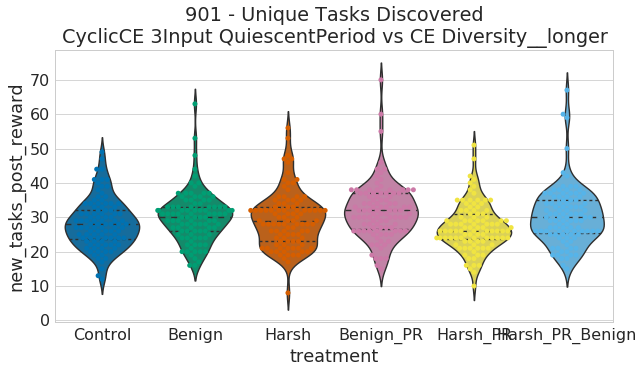

In [28]:
last_update = slice_200k[(slice_200k['update'] == 300000)]
#print last_update

sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title(data_number + " - Unique Tasks Discovered" + "\n"+data_name)
sns.violinplot(x="treatment", y="new_tasks_post_reward", 
               data=last_update, 
               #split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               #colors=['blue','green','red', 'darkgreen', 'darkred', 'brown']
               )
sns.swarmplot(x="treatment", y="new_tasks_post_reward", 
              data=last_update, 
              #split=True,
                 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#print "HELLO"

ctrl = last_update[last_update['treatment'] == 'Control']
benign = last_update[last_update['treatment'] == 'Benign']
harsh = last_update[last_update['treatment'] == 'Harsh']
benign_pr = last_update[last_update['treatment'] == 'Benign_PR']
harsh_pr = last_update[last_update['treatment'] == 'Harsh_PR']
harsh_pr_benign = last_update[last_update['treatment'] == 'Harsh_PR_Benign']

def mww(t1, t2):
    z_stat, p_val = stats.ranksums(t1['new_tasks_post_reward'], 
                                   t2['new_tasks_post_reward'])  
    print (z_stat)
    print (p_val)

    if p_val < (0.05): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
        
def oneway_anova(t1, t2, t3):
    f_stat, p_val = stats.f_oneway(t1['new_tasks_post_reward'], 
                               t2['new_tasks_post_reward'], 
                               t3['new_tasks_post_reward'])
    print (f_stat)
    print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
        
print "ctrl vs benign vs harsh - oneway anova"
oneway_anova(ctrl, benign, harsh)
print
print

print "benign_pr vs harsh_pr"
mww(benign_pr, harsh_pr)
print
print "ctrl vs benign_pr"
mww(ctrl, benign_pr)
print
print "ctrl vs harsh_pr"
mww(ctrl, harsh_pr)
print
print

print "benign vs benign_pr"
mww(benign, benign_pr)
print

print "benign_pr vs harsh_pr_benign"
mww(benign_pr, harsh_pr_benign)
print

print "harsh vs harsh_pr"
mww(harsh, harsh_pr)
print

ctrl vs benign vs harsh - oneway anova
0.303722163685
0.738294863556
can't reject null of sameness


benign_pr vs harsh_pr
2.74740207866
0.00600694431864
reject null of sameness (different)

ctrl vs benign_pr
-2.12086638957
0.0339330478129
reject null of sameness (different)

ctrl vs harsh_pr
0.65849330508
0.510221197608
can't reject null of sameness


benign vs benign_pr
-1.39216476298
0.163872510483
can't reject null of sameness

benign_pr vs harsh_pr_benign
-0.18107218837
0.856310914197
can't reject null of sameness

harsh vs harsh_pr
1.6517308877
0.0985894230949
can't reject null of sameness



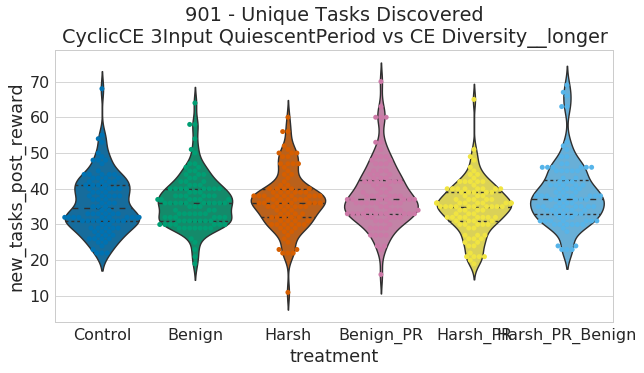

In [27]:
last_update = slice_200k[(slice_200k['update'] == 400000)]
#print last_update

sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title(data_number + " - Unique Tasks Discovered" + "\n"+data_name)
sns.violinplot(x="treatment", y="new_tasks_post_reward", 
               data=last_update, 
               #split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               #colors=['blue','green','red', 'darkgreen', 'darkred', 'brown']
               )
sns.swarmplot(x="treatment", y="new_tasks_post_reward", 
              data=last_update, 
              #split=True,
                 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#print "HELLO"

ctrl = last_update[last_update['treatment'] == 'Control']
benign = last_update[last_update['treatment'] == 'Benign']
harsh = last_update[last_update['treatment'] == 'Harsh']
benign_pr = last_update[last_update['treatment'] == 'Benign_PR']
harsh_pr = last_update[last_update['treatment'] == 'Harsh_PR']
harsh_pr_benign = last_update[last_update['treatment'] == 'Harsh_PR_Benign']

def mww(t1, t2):
    z_stat, p_val = stats.ranksums(t1['new_tasks_post_reward'], 
                                   t2['new_tasks_post_reward'])  
    print (z_stat)
    print (p_val)

    if p_val < (0.05): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
        
def oneway_anova(t1, t2, t3):
    f_stat, p_val = stats.f_oneway(t1['new_tasks_post_reward'], 
                               t2['new_tasks_post_reward'], 
                               t3['new_tasks_post_reward'])
    print (f_stat)
    print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
        
print "ctrl vs benign vs harsh - oneway anova"
oneway_anova(ctrl, benign, harsh)
print
print

print "benign_pr vs harsh_pr"
mww(benign_pr, harsh_pr)
print
print "ctrl vs benign_pr"
mww(ctrl, benign_pr)
print
print "ctrl vs harsh_pr"
mww(ctrl, harsh_pr)
print
print

print "benign vs benign_pr"
mww(benign, benign_pr)
print

print "benign_pr vs harsh_pr_benign"
mww(benign_pr, harsh_pr_benign)
print

print "harsh vs harsh_pr"
mww(harsh, harsh_pr)
print

# Task Discovery Rate

In [10]:
task_discovery_rate_data = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,101):
                
        bit = str(i).zfill(2) ## runs from 01 to 100
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/tasks.dat*'
        dfiles = sorted(glob.glob(globstring))

        for item in dfiles:
            sys.stdout.write('.')

            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=[0]+range(3, 71),
                              skipinitialspace=True) #, names=fields)
            
            
            df['treatment'] = [t] * len(df)
            df['replicate'] = [i] * len(df)
                
                
            ## TODO, collect the booled bits.
            ## figure out how to do this efficiently, while fighting with the fucking series.
            col_list = list(df)
            col_list.remove(0)
            
            tasks = df[col_list].where(lambda x : x > 3.6, axis=1) ## identify the non-transients
            tasks = tasks.fillna(value=0, axis=1).astype(bool)
            
            ## the running tally of all the tasks we've seen so far
            ## from the beginning of the experiment, and starting at 200k updates
            numtasks = len(tasks.iloc[0].tolist())
            discovered_tasks_so_far = [False] * numtasks
            discovered_tasks_so_far_post_reward = [False] * numtasks
            
            ## the number of new task discovered at each sampling (from 0, and 200k updates) 
            discovery_rate = []
            discovery_rate_post_reward = []

            last_discovered = 0 ## the total found so far
            last_discovered_post_reward = 0 
            
            for i in range(len(tasks)): ## one sample at a time
                
                currenttasks = tasks.iloc[i].tolist() # live tasks
                
                ## update us with the latest additions
                discovered_tasks_so_far = [k | j for k,j in zip(discovered_tasks_so_far, currenttasks)]
                discovered = sum(discovered_tasks_so_far)
                
                #if (discovered - last_discovered) > 0:
                #    sys.stdout.write(str(discovered - last_discovered))
                
                discovery_rate.append( discovered - last_discovered )
                last_discovered = discovered 
                
                if (i * 50) >= 200000:
                    
                    ## update us with the latest additions
                    discovered_tasks_so_far_post_reward = [k | j for k,j in zip(discovered_tasks_so_far_post_reward, currenttasks)]
                    discovered = sum(discovered_tasks_so_far_post_reward)
                
                    discovery_rate_post_reward.append( discovered - last_discovered_post_reward )
                    last_discovered_post_reward = discovered 
                    
                else:
                    discovery_rate_post_reward.append(0)
                                    
            df['discovery_rate'] = discovery_rate
            df['discovery_rate_post_reward'] = discovery_rate_post_reward
                
            dfs.append( df )
            
    intermediate = pd.concat(dfs)
    
    col_list = list(intermediate)
    col_list.remove(0)
    
    dta = pd.DataFrame()

    dta['update'] = intermediate[0]
    
    dta['treatment'] = intermediate['treatment']
        
    dta['replicate'] = intermediate['replicate']
    
    dta['discovery_rate'] = intermediate['discovery_rate']
    dta['discovery_rate_post_reward'] = intermediate['discovery_rate_post_reward']
    
    task_discovery_rate_data.append(dta)
        
    print "  done"
    
task_discovery_rate_data = pd.concat(task_discovery_rate_data)
print task_discovery_rate_data.head()
print task_discovery_rate_data.tail()

task_discovery_rate_data_slice_200k = task_discovery_rate_data.loc[task_discovery_rate_data['update'] >= 200000]



Control
....................................................................................................  done
Benign
...................................................................................................  done
Harsh
....................................................................................................  done
Benign_PR
....................................................................................................  done
Harsh_PR
....................................................................................................  done
Harsh_PR_Benign
....................................................................................................  done
   update treatment  replicate  discovery_rate  discovery_rate_post_reward
0       0   Control          1               1                           0
1      50   Control          1               0                           0
2     100   Control          1               0                           0
3  

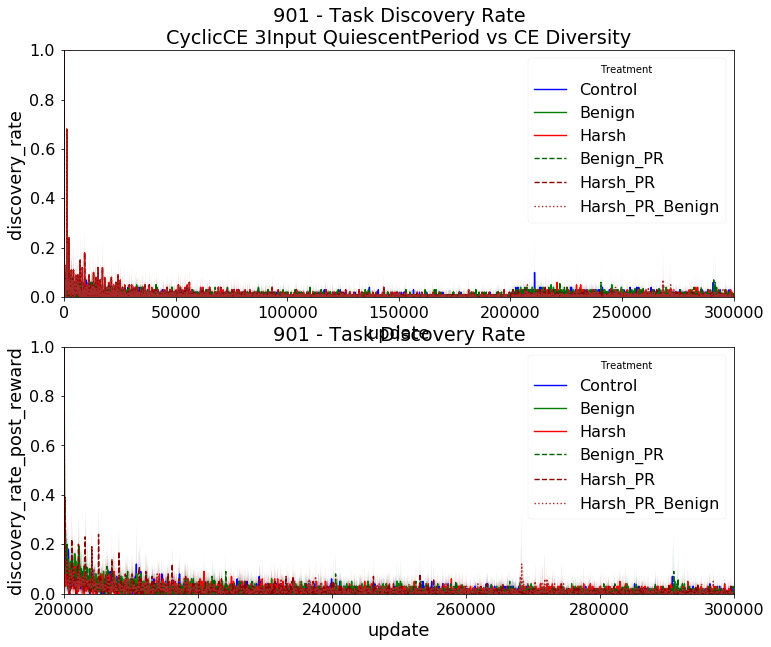

In [18]:
plt.rcParams['figure.figsize'] = (12, 10)

plt.subplot(211)

plt.title(data_number + " - Task Discovery Rate" + "\n"+data_name)
ax = sns.tsplot(time="update", value="discovery_rate",
                unit="replicate", 
                condition="treatment",
                data=task_discovery_rate_data,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')
ax.set_ylim([0,1])
                                  
                                  
plt.subplot(212)  
                                  
plt.title(data_number + " - Task Discovery Rate")
ax = sns.tsplot(time="update", value="discovery_rate_post_reward",
                unit="replicate", 
                condition="treatment",
                data=task_discovery_rate_data_slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')
ax.set_ylim([0,1])
                                  
plt.show()                                  

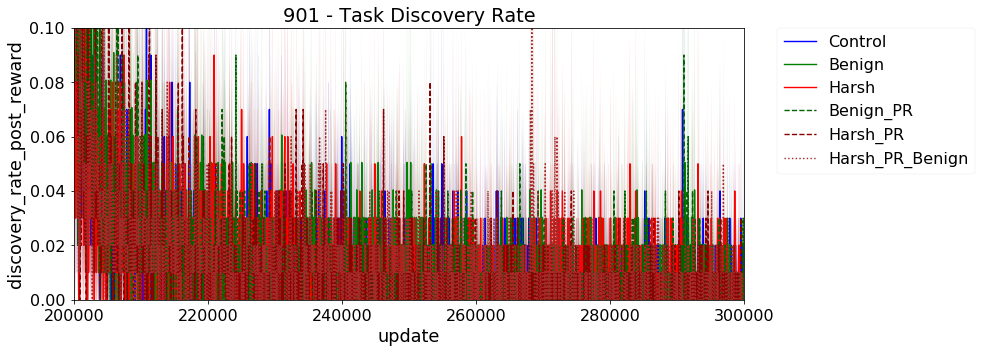

In [17]:
plt.rcParams['figure.figsize'] = (12, 5)
plt.title(data_number + " - Task Discovery Rate")
ax = sns.tsplot(time="update", value="discovery_rate_post_reward",
                unit="replicate", 
                condition="treatment",
                data=task_discovery_rate_data_slice_200k,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')
ax.legend(title='Treatment')
ax.set_ylim([0,0.1])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

.........

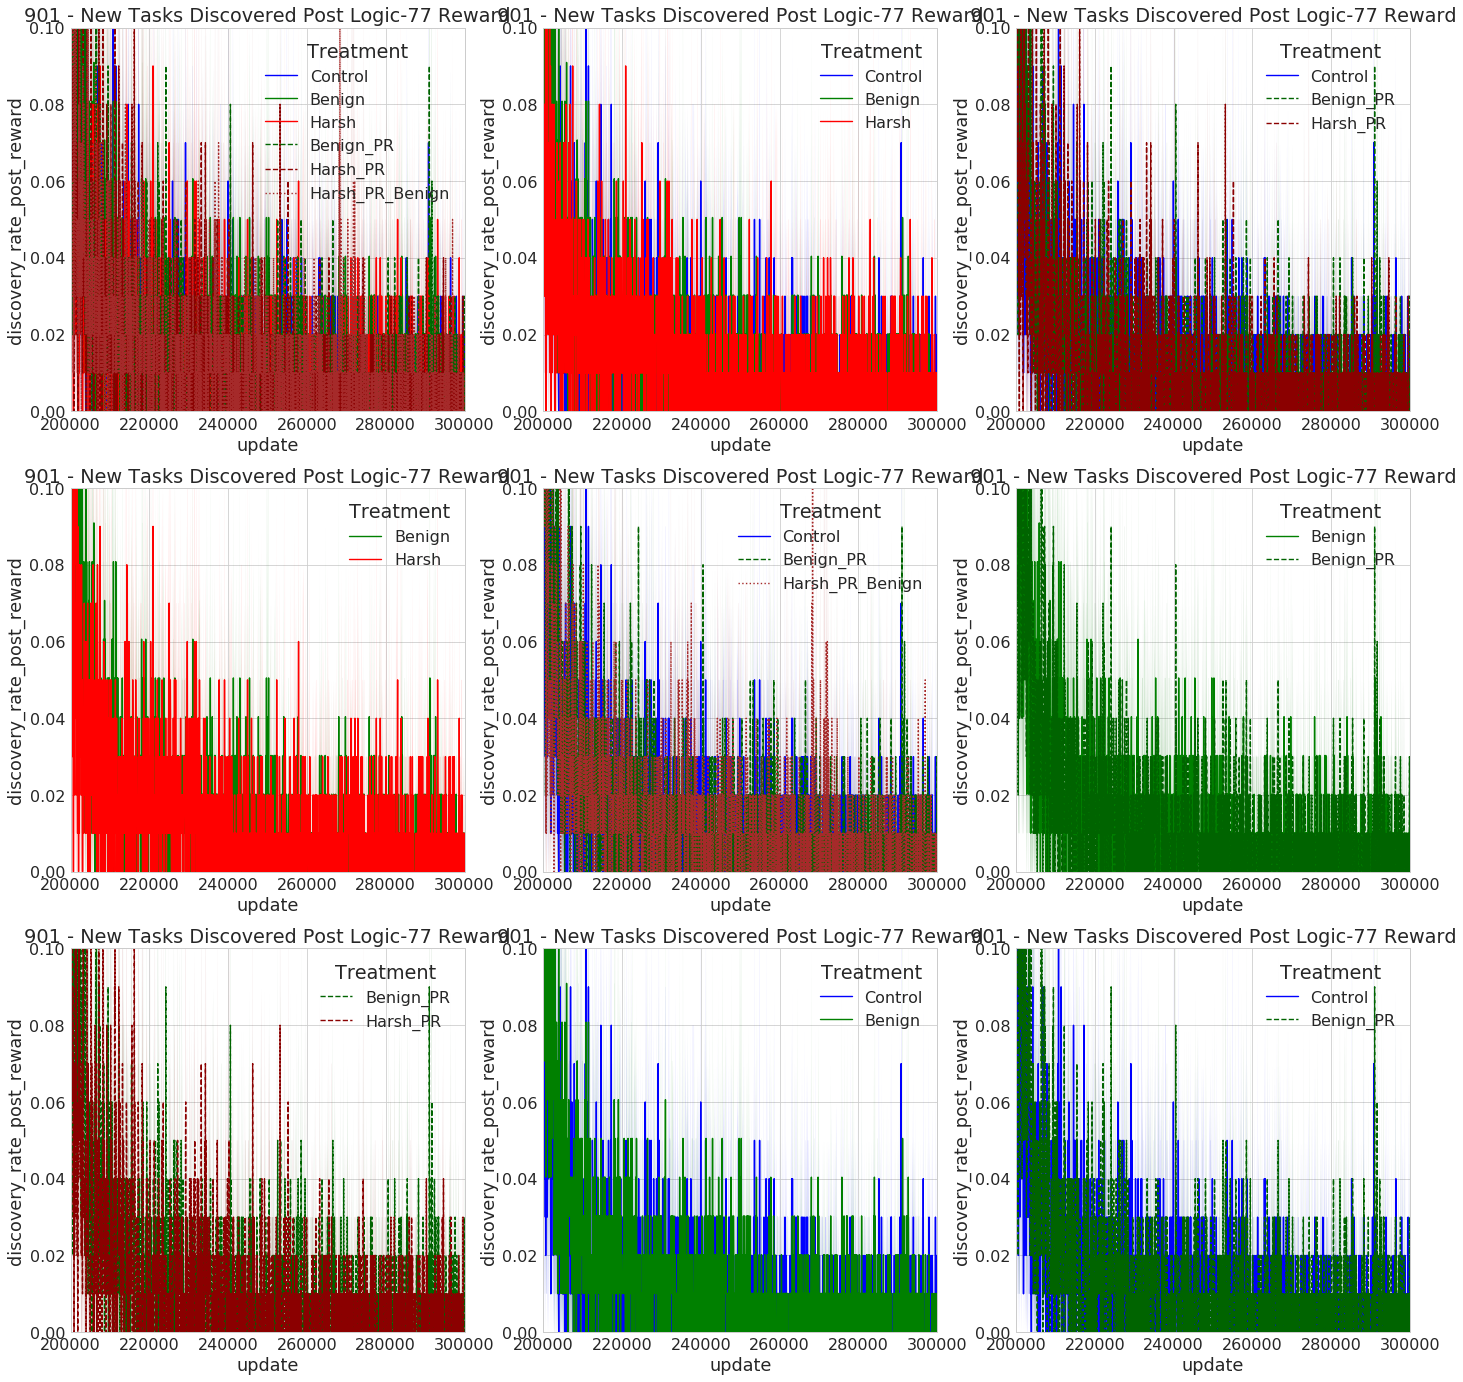

In [36]:
treatments = {'Control':['blue', '-'], 
              'Benign': ['green', '-'],
              'Harsh': ['red','-'],
              'Benign_PR': ['darkgreen', '--'],
              'Harsh_PR': ['darkred', '--'],
              'Harsh_PR_Benign': ['brown', ':'],}              
def plot_ts(names):
    
    bits = []
    for name in names:
        bits.append( task_discovery_rate_data_slice_200k[task_discovery_rate_data_slice_200k['treatment'] == name] )

    bits = pd.concat(bits)
    colors = [ treatments[name][0] for name in names ]
    #print colors
    styles = [ treatments[name][1] for name in names ]
    
    plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward")
    ax = sns.tsplot(time="update", value="discovery_rate_post_reward",
                    unit="replicate", 
                    condition="treatment",
                    data=bits,
                    color=colors,
                    ci=[95])
    
    for i in range(len(styles)):
        ax.lines[i].set_linestyle(styles[i])
    
    ax.legend(title='Treatment')
    ax.set_ylim([0,0.1])
    
    sys.stdout.write('.')

plt.rcParams['figure.figsize'] = (24, 24)

########### PLOT 1 -- 0,0

plt.subplot(331)
plot_ts(['Control', 'Benign', 'Harsh', 'Benign_PR', 'Harsh_PR', 'Harsh_PR_Benign'])

############ PLOT 2 -- 1,0

plt.subplot(332)
plot_ts(['Control', 'Benign', 'Harsh'])

############# PLOT 3 -- 2,0

plt.subplot(333)
plot_ts(['Control', 'Benign_PR', 'Harsh_PR'])

############# PLOT 4 -- 0,1

plt.subplot(334)
plot_ts(['Benign', 'Harsh'])

############# PLOT 5 -- 1,1

plt.subplot(335)
plot_ts(['Control', 'Benign_PR', 'Harsh_PR_Benign'])

############# PLOT 6 --2,1

plt.subplot(336)
plot_ts(['Benign', 'Benign_PR'])

############# PLOT 7 -- 0,2

plt.subplot(337)
plot_ts(['Benign_PR', 'Harsh_PR'])

############# PLOT 8 -- 1,2

plt.subplot(338)
plot_ts(['Control', 'Benign'])

############# PLOT 9 -- 2,2

plt.subplot(339)
plot_ts(['Control', 'Benign_PR'])

plt.show()


# Discovery Rate Means

Control
Benign
Harsh
Benign_PR
Harsh_PR
Harsh_PR_Benign
          treatment  replicate  mean_discovery_rate
0           Control          1             0.015492
1           Control          2             0.013993
2           Control          3             0.011494
3           Control          4             0.023488
4           Control          5             0.018491
5           Control          6             0.013493
6           Control          7             0.016492
7           Control          8             0.009995
8           Control          9             0.016992
9           Control         10             0.014993
10          Control         11             0.011994
11          Control         12             0.007496
12          Control         13             0.012994
13          Control         14             0.011994
14          Control         15             0.010495
15          Control         16             0.013993
16          Control         17             0.013993
17      

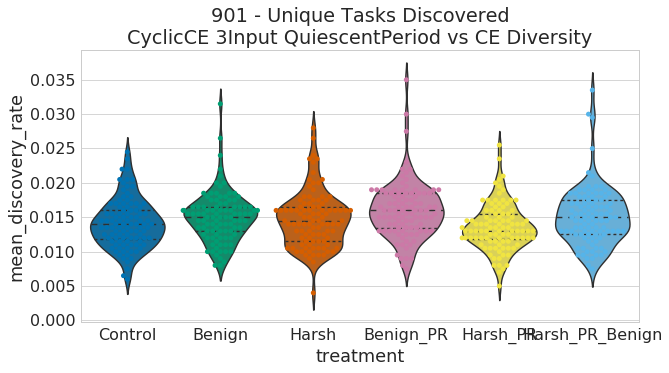

In [35]:
datas = []
for t in task_discovery_rate_data_slice_200k['treatment'].unique():
    print t

    sect = task_discovery_rate_data_slice_200k[ task_discovery_rate_data_slice_200k['treatment'] == t ]
    sums = []
    reps = []
    
#    print sect 
    
    for r in sect['replicate'].unique():
        #print r
        
        bit = sect[sect['replicate'] == r]
        
        #print bit
        
        sums.append(bit['discovery_rate_post_reward'].mean())
        reps.append(r)
        
    df = pd.DataFrame()
    df['treatment'] = [t] * len(sums)
    df['replicate'] = reps
    df['mean_discovery_rate'] = sums
    
    #print df
    
    
    datas.append(df)
    
datas = pd.concat(datas)

print datas    



#last_update = slice_200k[(slice_200k['update'] == 300000)]
#print last_update

sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)
plt.rcParams['figure.figsize'] = (10, 5)
plt.title(data_number + " - Unique Tasks Discovered" + "\n"+data_name)
sns.violinplot(x="treatment", y="mean_discovery_rate", 
               data=datas, 
               #split=True, 
               scale="count", scale_hue=False, bw=.3,
               inner="quart", 
               #colors=['blue','green','red', 'darkgreen', 'darkred', 'brown']
               )
sns.swarmplot(x="treatment", y="mean_discovery_rate", 
              data=datas, 
              #split=True,
                 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#print "HELLO"

ctrl = datas[datas['treatment'] == 'Control']
benign = datas[datas['treatment'] == 'Benign']
harsh = datas[datas['treatment'] == 'Harsh']
benign_pr = datas[datas['treatment'] == 'Benign_PR']
harsh_pr = datas[datas['treatment'] == 'Harsh_PR']
harsh_pr_benign = datas[datas['treatment'] == 'Harsh_PR_Benign']

def mww(t1, t2):
    z_stat, p_val = stats.ranksums(t1['mean_discovery_rate'], 
                                   t2['mean_discovery_rate'])  
    print (z_stat)
    print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
        
def oneway_anova(t1, t2, t3):
    f_stat, p_val = stats.f_oneway(t1['mean_discovery_rate'], 
                               t2['mean_discovery_rate'], 
                               t3['mean_discovery_rate'])
    print (f_stat)
    print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
        
print "ctrl vs benign vs harsh - oneway anova"
oneway_anova(ctrl, benign, harsh)
print
print

print "benign_pr vs harsh_pr"
mww(benign_pr, harsh_pr)
print
print "ctrl vs benign_pr"
mww(ctrl, benign_pr)
print
print "ctrl vs harsh_pr"
mww(ctrl, harsh_pr)
print
print

print "benign vs benign_pr"
mww(benign, benign_pr)
print

print "benign_pr vs harsh_pr_benign"
mww(benign_pr, harsh_pr_benign)
print

print "harsh vs harsh_pr"
mww(harsh, harsh_pr)
print

# Discovery Rate Resampling

In [1]:
periodized = task_discovery_rate_data_slice_200k


datas = []
for t in periodized['treatment'].unique():
    print t

    sect = periodized[ periodized['treatment'] == t ]
    
    pieces = []
    
    for r in sect['replicate'].unique():
        #print r
        
        bit = sect[sect['replicate'] == r]
        
        bit.index = bit['update']
        bit.index = pd.to_datetime(bit.index, unit='s')
        bit = bit.resample('2T').sum()
        
        bit['treatment'] = [t] * len(bit)
        bit['replicate'] = [r] * len(bit)
        
        print bit
        
        pieces.append(bit)
        
    pieces = pd.concat(pieces)
        
#    df = pd.DataFrame()
#    df['treatment'] = [t] * len(sums)
#    df['replicate'] = reps
#    df['mean_discovery_rate'] = sums
    
#    #print df
    
    
    datas.append(pieces)
    
datas = pd.concat(datas)

print datas    




# treatments = {'Control':['blue', '-'], 
#               'Benign': ['green', '-'],
#               'Harsh': ['red','-'],
#               'Benign_PR': ['darkgreen', '--'],
#               'Harsh_PR': ['darkred', '--'],
#               'Harsh_PR_Benign': ['brown', ':'],}              
# def plot_ts(names, data):
    
#     bits = []
#     for name in names:
#         part = data[data['treatment'] == name]
        
        
        
        
        
#         bits.append( part )
        
    

#     bits = pd.concat(bits)
    
#     #bits = 
    
#     colors = [ treatments[name][0] for name in names ]
#     #print colors
#     styles = [ treatments[name][1] for name in names ]
    
#     plt.title(data_number + " - New Tasks Discovered Post Logic-77 Reward")
#     ax = sns.tsplot(time="update", value="discovery_rate_post_reward",
#                     unit="replicate", 
#                     condition="treatment",
#                     data=bits,
#                     color=colors,
#                     ci=[95])
    
#     for i in range(len(styles)):
#         ax.lines[i].set_linestyle(styles[i])
    
#     ax.legend(title='Treatment')
#     ax.set_ylim([0,0.1])
    
#     sys.stdout.write('.')

# plt.rcParams['figure.figsize'] = (24, 24)

# plt.subplot(331)
# plot_ts(['Control', 'Benign', 'Harsh', 'Benign_PR', 'Harsh_PR', 'Harsh_PR_Benign'], periodized)

# plt.subplot(332)
# plot_ts(['Control', 'Benign', 'Harsh'], periodized)

# plt.subplot(333)
# plot_ts(['Control', 'Benign_PR', 'Harsh_PR'], periodized)

# plt.subplot(334)
# plot_ts(['Benign', 'Harsh'], periodized)

# plt.subplot(335)
# plot_ts(['Control', 'Benign_PR', 'Harsh_PR_Benign'], periodized)

# plt.subplot(336)
# plot_ts(['Benign', 'Benign_PR'], periodized)

# plt.subplot(337)
# plot_ts(['Benign_PR', 'Harsh_PR'], periodized)

# plt.subplot(338)
# plot_ts(['Control', 'Benign'], periodized)

# plt.subplot(339)
# plot_ts(['Control', 'Benign_PR'], periodized)

# plt.show()

NameError: name 'task_discovery_rate_data_slice_200k' is not defined

# Diversity

In [37]:
diversity_data = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,101):
                
        bit = str(i).zfill(2) ## runs from 01 to 50
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/by_site_entropy.csv*'
#        globstring = '../*' + treatments[t]['shortlabel'] + "_*0" + bit + '/data/by_site_entropy.csv*'
        dfiles = sorted(glob.glob(globstring))
        
        for item in dfiles:
            #print item
            sys.stdout.write('.')
            df = pd.read_csv(item, header=None, comment="#", 
                              #delimiter=',',
                              skiprows=5,
                              skipinitialspace=True) #, names=fields)
            
            #updates = range(200000, 300000, 500)
            #print len(updates)
            #print len(df)
            
            df['update'] = range(200000, 300001, 500)
            df['treatment'] = [t] * len(df)
            df['replicate'] = [i] * len(df)
                            
            #print df.head()
                
            dfs.append( df )
            
    intermediate = pd.concat(dfs)
    
    col_list = list(intermediate)
    col_list = col_list[:-3]
    #print col_list
    
    dta = pd.DataFrame()

    dta['update'] = intermediate['update']
    
    dta['treatment'] = intermediate['treatment']
        
    dta['replicate'] = intermediate['replicate']
    
    dta['normalized_entropy'] = intermediate[col_list].mean(axis=1)
        
#    bleh = intermediate[col_list].where(lambda x : x > 3.6, axis=1)
#    bleh = bleh.fillna(value=0, axis=1).astype(bool).sum(axis=1)   
#    dta['task_ct'] = bleh
        
    #print dta.describe()
    #print dta.head()
    
    diversity_data.append(dta)
        
    print "  done"
    
diversity_data = pd.concat(diversity_data)

#print diversity_data.describe()
#print diversity_data.head()       

Control
....................................................................................................  done
Benign
...................................................................................................  done
Harsh
....................................................................................................  done
Benign_PR
....................................................................................................  done
Harsh_PR
....................................................................................................  done
Harsh_PR_Benign
...................................................................................................  done


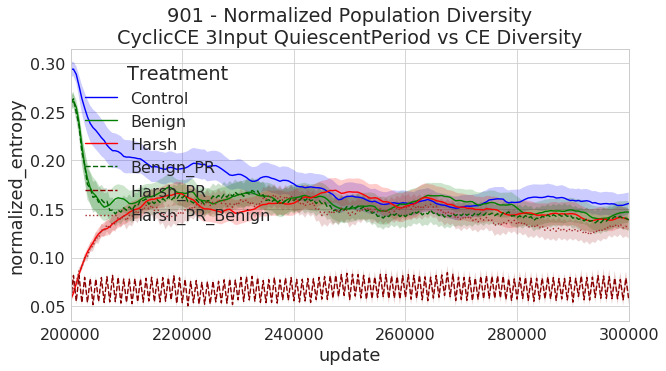

In [38]:
plt.title(data_number + " - Normalized Population Diversity" + "\n"+data_name)
ax = sns.tsplot(time="update", value="normalized_entropy",
                unit="replicate", 
                condition="treatment",
                data=diversity_data,
                color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
                ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
plt.show()

# Fitness - Timeseries

In [39]:
datafile = "log_average.dat"
fields = ['update', 
          'fitness', 'fitness STE', 'fitness Variance', 
          'log fitness', 'log fitness STE', 'log fitness Variance' ]


fitness_data = []
tct = 0
for t in treatments:  
    tct += 1
    print t
    
    dfs = []
        
    for i in range(1,101):
                
        bit = str(i).zfill(2) ## runs from 01 to 50
        globstring = '../*' + treatments[t]['dir'] + "*" + bit + '/data/' + datafile + '*'
#        globstring = '../*' + treatments[t]['shortlabel'] + "_*0" + bit + '/data/' + datafile + '*'
        dfiles = sorted(glob.glob(globstring))

        
        
        for item in dfiles:
            #print item
            sys.stdout.write('.')
            df = pd.read_csv(item, header=None, comment="#", 
                              delimiter=' ', usecols=range(7),
                              skipinitialspace=True, names=fields)
            
            
            #df.index.name = 'update'
            #print df.head()
            
            df['treatment'] = [t] * len(df)
            df['replicate'] = [i] * len(df)
                
            dfs.append( df )
            
    dta = pd.concat(dfs)

    
    #print dta.head()
    
    fitness_data.append(dta)
        
    print "  done"
    
fitness_data = pd.concat(fitness_data)

#print fitness_data.describe()
#print fitness_data.head()       

Control
....................................................................................................  done
Benign
...................................................................................................  done
Harsh
....................................................................................................  done
Benign_PR
....................................................................................................  done
Harsh_PR
....................................................................................................  done
Harsh_PR_Benign
....................................................................................................  done


In [40]:
fitness_slice_200k = fitness_data.loc[fitness_data['update'] >= 200000]
#slice_210k = slice_200k.loc[slice_200k['update'] < 210000]


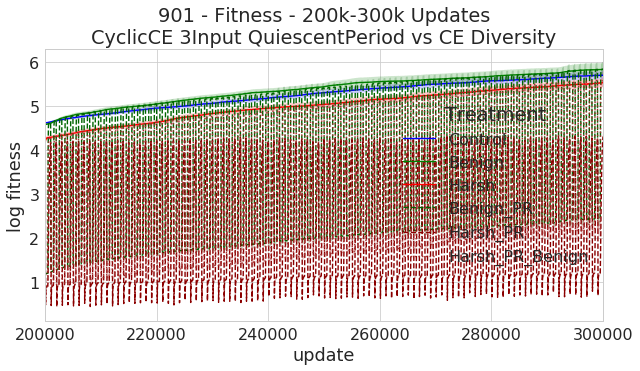

In [41]:
plt.title(data_number + " - Fitness - 200k-300k Updates" + "\n"+data_name)
ax = sns.tsplot(time="update", value="log fitness",
           unit="replicate", 
           condition="treatment",
           data=fitness_slice_200k,
           color=['blue','green','red', 'darkgreen', 'darkred', 'brown'],
           ci=[95])
ax.lines[-3].set_linestyle('--')
ax.lines[-2].set_linestyle('--')
ax.lines[-1].set_linestyle(':')

ax.legend(title='Treatment')
plt.show()
